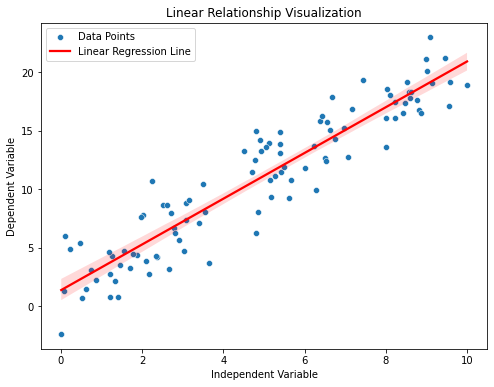

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample data
X = np.random.rand(100) * 10
y = 2 * X + 1 + np.random.randn(100) * 2  # Linear relationship with some noise

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X, y=y, label='Data Points')

# Fit and plot the regression line
sns.regplot(x=X, y=y, scatter=False, color='red', label='Linear Regression Line')

# Set labels and title
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Linear Relationship Visualization')

# Show the plot
plt.legend()
plt.show()
